<a href="https://colab.research.google.com/github/sugato1398/Internship-scripts/blob/master/pytorch_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import os

In [0]:
%matplotlib inline

## Linear regression


In [0]:
w = torch.tensor(3.5, requires_grad=True)
b=torch.tensor(2.0,requires_grad=True)

In [0]:
# this function recieves the input x and computes value of y
def forward(x):
  y=w*x+b
  return y

In [0]:
x=torch.tensor(2.0)
forward(x)

NameError: ignored

In [0]:
x1=torch.tensor([[1],[5]])
forward(x1)

tensor([[ 5],
        [17]], grad_fn=<AddBackward0>)

In [0]:
torch.manual_seed(1) # sets a seed for random numbers, it will feed random values for the linear class that is onvoked from torch.nn

model=nn.Linear(in_features=1,out_features=1) # this line signifies that for each output (prediction) we have 1 input (in_features)

#print the default parametres
print(model.bias,model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [0]:
x=torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [0]:
class linReg(nn.Module): # Module acts as a base class for all other models, so our class will be a subclass of nn.Module and hence inherit variables and methods from this parent class
  def __init__(self,in_size,out_size):
    super().__init__()     # allows for more privilege for using instances from parent clases
    self.linear = nn.Linear(in_size,out_size)
    
  def forward(self,x):     # we define forwardfunction so that it can be accessed b any instance of the class
    pred=self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model = linReg(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [0]:
model.forward(x)

tensor([0.5891], grad_fn=<AddBackward0>)

Text(0.5, 0, 'X')

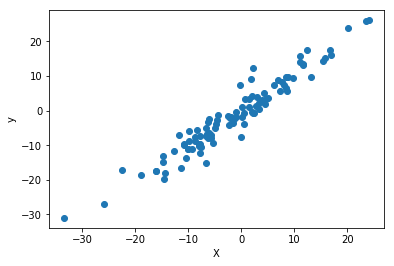

In [0]:
X=torch.randn(100,1)*10
y=X+3*torch.randn(100,1)
plt.plot(X.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('X')

In [0]:
[w,b]=model.parameters()
w,b

(Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True))

note from above output that the weight is a 2D tensor with one column and one row, so we can access the values by w[0][0],   and note the bias is a 1D tensor, so it can be accessed by b[0]

In [0]:
print(w[0][0])
print(b[0])


tensor(0.5153, grad_fn=<SelectBackward>)
tensor(-0.4414, grad_fn=<SelectBackward>)


we get a tensor by doing indexing,  add a .item() to get a python number of the tensor values

In [0]:
w[0][0].item()

0.5152631998062134

In [0]:
def plot_fit(title):
  plt.title=title
  
  w1=w[0][0].item()
  b1=b[0].item()
  
  x1=np.array([-35,30])
  y1 = w1*x1 + b1
  plt.plot(x1,y1,'r',linewidth=3)
  plt.scatter(X,y)
  plt.show()
    
  

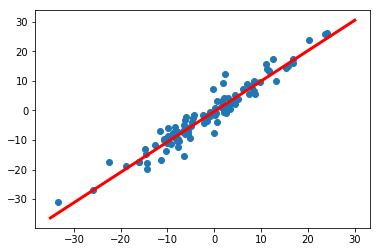

In [0]:
plot_fit('Initial Model')

so we can observe that this is not the best fit line, so we need an optimisation algorithm to get our best fit line

In [0]:
# find the loss

criterion = nn.MSELoss()

# define optimiser that will use gradient descent (stochastic grad des) to update our parametres,  in its arguments put the parametres that needs to be updated and the learning rate

optimizer=torch.optim.SGD(model.parameters(), lr = 0.001)

In [0]:
# one pass through the data is one epoch

epochs=100
losses=[]

for i in range(epochs):
  '''get all the predictions of the data and compare with the given values to compute the loss'''
  
  y_pred=model.forward(X)
  
  loss= criterion(y_pred,y)
  
  print('epoch:',i," loss : ",loss.item())
  losses.append(loss)
  
  optimizer.zero_grad()  # set the gradients to 0 as with the backward pass the gradients accumulate, so we zero them out
  loss.backward()  # claculate the gradients of the loss
  
  optimizer.step()  # update the model prameters
  



epoch: 0  loss :  36.44832992553711
epoch: 1  loss :  25.84706687927246
epoch: 2  loss :  19.274919509887695
epoch: 3  loss :  15.200485229492188
epoch: 4  loss :  12.674422264099121
epoch: 5  loss :  11.10822868347168
epoch: 6  loss :  10.137072563171387
epoch: 7  loss :  9.534791946411133
epoch: 8  loss :  9.161184310913086
epoch: 9  loss :  8.92933464050293
epoch: 10  loss :  8.785365104675293
epoch: 11  loss :  8.69587516784668
epoch: 12  loss :  8.640158653259277
epoch: 13  loss :  8.605380058288574
epoch: 14  loss :  8.58358097076416
epoch: 15  loss :  8.569830894470215
epoch: 16  loss :  8.56106948852539
epoch: 17  loss :  8.555403709411621
epoch: 18  loss :  8.551656723022461
epoch: 19  loss :  8.549099922180176
epoch: 20  loss :  8.547282218933105
epoch: 21  loss :  8.545924186706543
epoch: 22  loss :  8.54485034942627
epoch: 23  loss :  8.543954849243164
epoch: 24  loss :  8.543170928955078
epoch: 25  loss :  8.54245662689209
epoch: 26  loss :  8.541786193847656
epoch: 27  lo

problem that was faced-   with the number of epochs the error shooted out to a huge number, it was resolved by changing the learning rate in the optimizer, 

*   initially lr - 0.01                  losses exploded 

*   change lr -  0.001               huge losses in beginning but converged finally
* change lr - 0.003                losses stable 


Or .... reset all runtimes ...as suggested in video..it worked out too





Text(0, 0.5, 'loss')

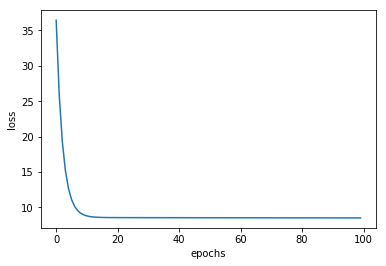

In [0]:
plt.plot(range(epochs),losses)
plt.xlabel('epochs')
plt.ylabel('loss')

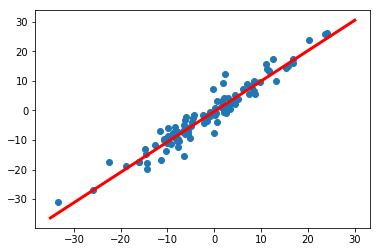

In [0]:
plot_fit('Trained Model')

As we see , with the trained weights the model has quite nicely generalised on the given datapoints

### Pytorch documentation

#### Creating a neural etwork

In [0]:
class net(nn.Module):
  def __init__(self):
    super(net,self).__init__()
    
    # 1 input image, 6 outputs and 3x3 kernels
    
    self.conv1=nn.Conv2d(1,3,3)
    self.conv2=nn.Conv2d(6,16,3)
    
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    
    
  def forward(self,X):
    x=self.conv1(X)
    x=F.relu(x)
    x=F.max_pool2d(x,(2,2))
    
    x=self.conv2(x)
    x=F.relu(x)
    x=F.max_pool2d(x,2)
    
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features(self,x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

    

In [0]:
n=net()
print(n)

net(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## Classifier building pytorch documentation

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
x,y=trainset[0]
x.shape

torch.Size([3, 32, 32])

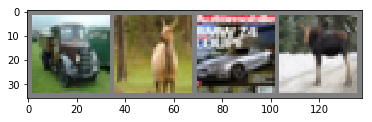

 truck 	    deer 	     car 	    deer 	 


In [0]:

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%6s \t ' % classes[labels[j]] for j in range(4)))

####  Define your custom  deep-neural network

In [0]:
class cnn(nn.Module):
  def __init__(self):
    super(cnn,self).__init__()
    
    self.conv1=nn.Conv2d(3,6,kernel_size=5,stride=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5,stride=1,padding=0)
    self.conv3=nn.Conv2d(16,32,kernel_size=3,stride=1,padding=0)
    self.fc1 = nn.Linear(32 * 3 * 3,96)
    self.fc2 = nn.Linear(96, 48)
    self.fc3 = nn.Linear(48, 10)
    
  def forward(self,X):
    
    x = self.pool(F.relu(self.conv1(X)))
    x = self.pool(F.relu(self.conv2(x)))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 32 * 3 * 3)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  

In [0]:
16*3*3

144

#### define the loss function and the optimizer function ( method by which our parametres will be updated)

In [0]:
C=cnn()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(C.parameters(), lr=0.001, momentum=0.9)

#### Training step : train the deep-net via passing the images in 'n' number of epochs and train the parametres and calculate the loss

In [0]:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = C(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.291
[1,  4000] loss: 2.042
[1,  6000] loss: 1.831
[1,  8000] loss: 1.686
[1, 10000] loss: 1.608
[1, 12000] loss: 1.553
[2,  2000] loss: 1.471
[2,  4000] loss: 1.435
[2,  6000] loss: 1.425
[2,  8000] loss: 1.400
[2, 10000] loss: 1.370
[2, 12000] loss: 1.366
[3,  2000] loss: 1.326
[3,  4000] loss: 1.301
[3,  6000] loss: 1.284
[3,  8000] loss: 1.288
[3, 10000] loss: 1.272
[3, 12000] loss: 1.240
[4,  2000] loss: 1.215
[4,  4000] loss: 1.194
[4,  6000] loss: 1.214
[4,  8000] loss: 1.228
[4, 10000] loss: 1.194
[4, 12000] loss: 1.203
Finished Training


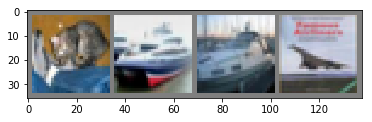

GroundTruth:    cat  ship  ship plane


In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


TypeError: ignored

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = C(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = C(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 67 %
Accuracy of  bird : 40 %
Accuracy of   cat : 27 %
Accuracy of  deer : 61 %
Accuracy of   dog : 52 %
Accuracy of  frog : 60 %
Accuracy of horse : 57 %
Accuracy of  ship : 74 %
Accuracy of truck : 61 %


# Cats and Dogs transfer learning

#### collecting data from kaggle

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
import math

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sugato","key":"5266d96ba3bafe2c40e903ff048692e5"}'}

In [0]:
!cp kaggle.json ~/.kaggle/


In [0]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 268M/271M [00:01<00:00, 183MB/s]
100% 271M/271M [00:01<00:00, 144MB/s]
 98% 534M/544M [00:04<00:00, 128MB/s]
100% 544M/544M [00:04<00:00, 130MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 113MB/s]


In [0]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin

In [0]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/100.jpg            
  inflating: test/1000.jpg           
  inflating: test/10000.jpg          
  inflating: test/10001.jpg          
  inflating: test/10002.jpg          
  inflating: test/10003.jpg          
  inflating: test/10004.jpg          
  inflating: test/10005.jpg          
  inflating: test/10006.jpg          
  inflating: test/10007.jpg          
  inflating: test/10008.jpg          
  inflating: test/10009.jpg          
  inflating: test/1001.jpg           
  inflating: test/10010.jpg          
  inflating: test/10011.jpg          
  inflating: test/10012.jpg          
  inflating: test/10013.jpg          
  inflating: test/10014.jpg          
  inflating: test/10015.jpg          
  inflating: test/10016.jpg          
  inflating: test/10017.jpg          
  inflating: test/10018.jpg          
  inflating: test/10019.jpg          
  inflating:

#### Create proper folder structure for cats dogs train and valid sets

In [0]:
os.listdir()

['.config',
 'test.zip',
 'test',
 'train',
 'kaggle.json',
 'sample_submission.csv',
 'train.zip',
 'sample_data']

In [0]:
os.mkdir('train/cats')
os.mkdir('train/dogs')

In [0]:
os.mkdir('valid')
os.mkdir('valid/cats')
os.mkdir('valid/dogs')

In [0]:
len(os.listdir('train'))

25002

In [0]:
c_cat=0
c_dog=0

for file in os.listdir('train'):
  if file.startswith('cat.'):
    if c_cat<10000:
      os.rename('train/'+file,'train/cats/'+file)
      c_cat+=1
    else:
      os.rename('train/'+file,'valid/cats/'+file)
      
  elif file.startswith('dog.'):
    if c_dog<10000:
      os.rename('train/'+file,'train/dogs/'+file)
      c_dog+=1
    else:
      os.rename('train/'+file,'valid/dogs/'+file)

2500

### Data augmentation

In [0]:
data_transforms={
    'train' : transforms.Compose([
              transforms.RandomRotation(5),
              transforms.RandomHorizontalFlip(),
              transforms.RandomResizedCrop(224,scale=(0.96,1.0),ratio=(0.95, 1.05)),
              transforms.ToTensor(),
              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]) , 
    
    'valid' : transforms.Compose([
              transforms.Resize((224,224)),
              transforms.ToTensor(),
              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
}

#### Load train and test datasets

In [0]:
trainset=datasets.ImageFolder(root='train',transform=data_transforms['train'])
validset=datasets.ImageFolder(root='valid',transform=data_transforms['valid'])


In [0]:
train_loader=DataLoader(trainset,batch_size=50,shuffle=True)
valid_loader=DataLoader(validset,batch_size=50,shuffle=True)

#### bit playing with data

In [0]:
data,target=next(iter(train_loader))

In [0]:
data.size(0)

50

In [0]:
len(train_loader.dataset)

20000

In [0]:
x,y=trainset[2]
x.shape

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


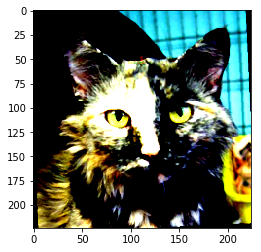

In [0]:
x=x.numpy()
plt.imshow(np.transpose(x, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


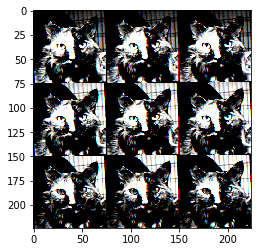

In [0]:
plt.imshow(x.reshape((224,224,3)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


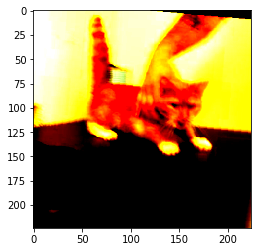

In [0]:
plt.imshow(  x.permute(1, 2, 0)  )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


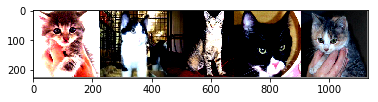

In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

img=[]
lab=[]
for i in range(3,8):
  img.append(trainset[i][0])
  lab.append(trainset[i][1])
  

imshow(torchvision.utils.make_grid(img))

In [0]:
len(trainset)

20000

In [0]:
print(trainset.class_to_idx)

{'cats': 0, 'dogs': 1}


In [0]:
trainset.classes

['cats', 'dogs']

### Defiine custom neural net

In [0]:
class Net(nn.Module):
  
  def __init__(self):
    
    def super(Net,self).__init__():
        

### Download pretrained Model

In [0]:
model=torchvision.models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:26<00:00, 20860862.65it/s]


##### freeze the model parameters

In [0]:
for param in model.parameters():
  param.requires_grad=False

In [0]:
model.classifier
model.to('cuda')

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
in_inp=model.classifier[6].in_features
in_inp

4096

In [0]:
num_classes=len(trainset.classes)

In [0]:
model.classifier[6]=nn.Sequential(
                      nn.Linear(in_inp,256),
                      nn.ReLU(),
                      nn.Dropout(0.9),
                      nn.Linear(256,num_classes),
                       nn.LogSoftmax(dim=1))

In [0]:
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters())
step_size = 4*len(train_loader)

end_lr=3e-2
clr = cyclical_lr(step_size, min_lr=end_lr/6, max_lr=end_lr)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, [clr])

In [0]:
len(train_loader)

400

#### Define model training module

In [0]:
def cyclical_lr(stepsize, min_lr=3e-2, max_lr=3e-3):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = math.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

In [0]:
from timeit import default_timer as timer

In [0]:
def model_train(epochs):
  
  for i in range(epochs):
    
    train_loss=0
    valid_loss=0
    
    train_acc=0
    valid_acc=0
    
    model.train()
    start=timer()
    
    for data,target in train_loader:
      data,target=data.cuda(),target.cuda()
      
      optimizer.zero_grad()
      
      output=model(data)
      
      loss=criterion(output,target)
      loss.backward()
      optimizer.step()
      scheduler.step()
      
      train_loss+=loss.item() * data.size(0)
      _, pred = torch.max(output, dim=1)
      correct_tensor = pred.eq(target.data.view_as(pred))
      accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
      train_acc += accuracy.item() * data.size(0)
      
    print(f'\nEpoch: {i}\t {timer() - start:.2f} seconds elapsed in epoch.')
      
    with torch.no_grad():
        
        model.eval()
        
        for data,target in valid_loader:
          
          data,target=data.cuda(),target.cuda()
          
          output=model(data)
          
          loss=criterion(output,target)
          valid_loss+=loss.item()*data.size(0)
          
          _, pred = torch.max(output, dim=1)
          correct_tensor = pred.eq(target.data.view_as(pred))
          accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
          # Multiply average accuracy times the number of examples
          valid_acc += accuracy.item() * data.size(0)
        
    train_loss=train_loss/len(train_loader.dataset)
    valid_loss=valid_loss/len(valid_loader.dataset)

    train_acc=train_acc/len(train_loader.dataset)
    valid_acc=valid_acc/len(valid_loader.dataset)

    print(f'Epoch: {i} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}')
    print(f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%')
      

In [0]:
model_train(epochs=5)


Epoch: 0	 271.77 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 0.4929 	Validation Loss: 0.2036
		Training Accuracy: 75.96%	 Validation Accuracy: 97.76%

Epoch: 1	 280.76 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.1843 	Validation Loss: 0.0783
		Training Accuracy: 94.57%	 Validation Accuracy: 98.18%

Epoch: 2	 283.99 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 0.1019 	Validation Loss: 0.0513
		Training Accuracy: 96.81%	 Validation Accuracy: 98.36%

Epoch: 3	 254.08 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 0.0725 	Validation Loss: 0.0407
		Training Accuracy: 97.60%	 Validation Accuracy: 98.52%

Epoch: 4	 225.81 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 0.0638 	Validation Loss: 0.0370
		Training Accuracy: 97.80%	 Validation Accuracy: 98.64%


In [0]:
for param in model.parameters():
  param.requires_grad=True

  
model_train(epochs=3)


Epoch: 0	 435.41 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 0.0405 	Validation Loss: 0.0280
		Training Accuracy: 98.65%	 Validation Accuracy: 98.88%

Epoch: 1	 438.45 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.0210 	Validation Loss: 0.0279
		Training Accuracy: 99.28%	 Validation Accuracy: 99.08%

Epoch: 2	 439.40 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 0.0101 	Validation Loss: 0.0291
		Training Accuracy: 99.69%	 Validation Accuracy: 99.18%


In [0]:
def roadsAndLibraries(n, c_lib, c_road, cities):
    total = 0
    if c_lib < c_road:
        total = n*c_lib
    else:       
        neighbours = {}
        visited = [False] * n
        connectedComponents = 0
        nodes_per_cluster = {}

        #recursive DFS
        def dfs(i,cluster):
            if not visited[i]:
                #check how many unique nodes are in this cluster
                nodes_per_cluster[cluster] = (
                    nodes_per_cluster.get(cluster,0) + 1)
            #mark this as visited
            visited[i] = True
            my_neighbours = []
            try:
                my_neighbours = neighbours[i+1] 
            except KeyError as ke:
                # we found a single node cluster (city with one house)
                # leave the list empty and the for-loop will skip it
              pass 
            for city_id in my_neighbours:
                if not visited[city_id-1]:
                    dfs(city_id-1,cluster)

        #populate the adjacency list
        for road in cities:
            neighbours[road[0]] = (
                neighbours.get(road[0],[]) + [road[1]])
            neighbours[road[1]] = (
                neighbours.get(road[1],[]) + [road[0]])
        
        for i in range(n):
            if not visited[i]:
                dfs(i,i)
                connectedComponents += 1

        #min number of roads is always number of houses - 1      
        roads = sum(x-1 for x in nodes_per_cluster.values())
            
        total = c_road * roads + c_lib * connectedComponents
    return total

disjoint set implementation

In [0]:
def find_set(x, sets):
    if sets[x] < 0:
        return x
    else:
        sets[x] = find_set(sets[x], sets)
        return sets[x]

def union_set(u, v, sets):
    a = find_set(u, sets)
    b = find_set(v, sets)

    newSize = sets[a] + sets[b]

    if sets[a] > sets[b]:
        sets[a] = b
        sets[b] = newSize
    else:
        sets[b] = a
        sets[a] = newSize

n, p = map(int, input().split())
sets = [-1 for _ in range(n)]

for _ in range(p):
    u, v = map(int, input().split())
    set_u = find_set(u, sets)
    set_v = find_set(v, sets)

    if set_u != set_v:
        union_set(set_u, set_v, sets)

l = [0] * n
for i in range(n):
    if sets[i] < 0:
        l[i] += 1
    else:
        l[find_set(sets[i], sets)] += 1

summ = 0
ans = 0
for i in l:
    ans += i * summ
    summ += i
print(ans)